In [600]:
from tensorflow.keras.layers import *
from tensorflow.keras.activations import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.losses import *
from tensorflow.keras.metrics import *
from tensorflow.keras.initializers import *
from tensorflow.keras.utils import *
from tensorflow.keras.models import *
from tensorflow.keras.datasets import *
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import datetime
import os
import pandas as pd
from PIL import Image
from matplotlib import image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping , ModelCheckpoint,ReduceLROnPlateau

Machine Amrta

In [601]:
filename = "C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\Scripts_Recup_Data\\Projet_Annuel_Data\\Data_Train_Foot.csv"
filename_test= 'C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\Scripts_Recup_Data\\Projet_Annuel_Data\\Data_Test_Foot.csv'

Machine Dylane

In [602]:
filename = 'Scripts_Recup_Data/Projet_Annuel_Data/Data_Train_Foot.csv'
filename_test= 'Scripts_Recup_Data/Projet_Annuel_Data/Data_Test_Foot.csv'

In [603]:
# Chargement des données csv

data= pd.read_csv(filename,sep=";",index_col=0)

# y prend le score à prédire
y=data.score
data.head()


,date,homeTeam,awayTeam,score,mi_temps_gagnante,goalHomeTeam_FullTime,goalAwayTeam_FullTime,goalHomeTeam_HalfTime,goalAwayTeam_HalfTime,NbgoalsHalfTime,...,moy_goals_home,moy_goals_away,moy_goals_half_home,moy_goals_half_away,moy_goals_conceded_home,moy_goals_conceded_away,moy_goals_conceded_half_home,moy_goals_conceded_half_away,puissance_HomeTeam,puissance_AwayTeam
0,2019-08-09 00:00:00,AS Monaco FC,Olympique Lyonnais,2.0,1,0.0,3.0,0.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2409,6154
1,2019-08-10 00:00:00,Olympique de Marseille,Stade de Reims,2.0,2,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4008,3054
2,2019-08-10 00:00:00,Montpellier HSC,Stade Rennais FC 1901,2.0,1,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3029,4815
3,2019-08-10 00:00:00,OGC Nice,Amiens SC,1.0,2,2.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2803,2045
4,2019-08-10 00:00:00,Stade Brestois 29,Toulouse FC,0.0,1,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2156,1065


## Avec les win/lose cons

In [604]:
x=data[['puissance_HomeTeam','puissance_AwayTeam','win_cons_home','win_cons_away','lose_cons_home',
        'lose_cons_away','moy_goals_home','moy_goals_away','moy_goals_half_home','moy_goals_half_away',
       'moy_goals_conceded_home','moy_goals_conceded_away','moy_goals_conceded_half_home','moy_goals_conceded_half_away']]
x

,puissance_HomeTeam,puissance_AwayTeam,win_cons_home,win_cons_away,lose_cons_home,lose_cons_away,moy_goals_home,moy_goals_away,moy_goals_half_home,moy_goals_half_away,moy_goals_conceded_home,moy_goals_conceded_away,moy_goals_conceded_half_home,moy_goals_conceded_half_away
0,2409,6154,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,4008,3054,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,3029,4815,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,2803,2045,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,2156,1065,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,6451,15239,1,1,0,0,1.370370,2.814815,0.613757,1.439153,0.984127,1.037037,0.396825,0.433862
376,4273,5802,0,2,1,0,1.306878,1.164021,0.587302,0.497354,1.164021,1.412698,0.544974,0.656085
377,13709,4725,1,2,0,0,1.724868,1.253968,0.693122,0.608466,0.640212,1.407407,0.232804,0.640212
378,14840,4571,0,1,1,0,2.920635,1.444444,1.105820,0.682540,0.809524,1.391534,0.349206,0.640212


In [605]:
data_test= pd.read_csv(filename_test,sep=";",index_col=0)
x_prediction=data_test[['date','status','id_match','homeTeam','awayTeam','idHomeTeam','idAwayTeam',
                        'puissance_HomeTeam','puissance_AwayTeam','win_cons_home','win_cons_away',
                        'lose_cons_home','lose_cons_away','moy_goals_home','moy_goals_away',
                        'moy_goals_half_home','moy_goals_half_away','moy_goals_conceded_home',
                        'moy_goals_conceded_away','moy_goals_conceded_half_home',
                        'moy_goals_conceded_half_away']]
x_prediction

,date,status,id_match,homeTeam,awayTeam,idHomeTeam,idAwayTeam,puissance_HomeTeam,puissance_AwayTeam,win_cons_home,...,lose_cons_home,lose_cons_away,moy_goals_home,moy_goals_away,moy_goals_half_home,moy_goals_half_away,moy_goals_conceded_home,moy_goals_conceded_away,moy_goals_conceded_half_home,moy_goals_conceded_half_away
1082,2020-06-30,FINISHED,273885,FC Barcelona,Club Atlético de Madrid,81,78,13105,9329,0,...,0,0,2.102564,1.325000,1.025641,0.475000,0.950000,0.750000,0.400000,0.375000
1980,2020-06-30,FINISHED,274432,Vitória SC,Vitória FC,5543,5620,3593,3593,0,...,1,2,1.642857,0.785714,0.678571,0.285714,1.142857,1.250000,0.678571,0.535714
1982,2020-07-01,FINISHED,274433,Os Belenenses Futebol,CD Tondela,5568,1049,1589,1729,0,...,2,2,0.857143,0.821429,0.571429,0.392857,1.571429,1.250000,0.678571,0.750000
1983,2020-07-01,FINISHED,274431,Sporting Clube de Portugal,Gil Vicente FC,498,5533,5314,1346,3,...,0,0,1.607143,1.071429,0.892857,0.428571,1.035714,1.250000,0.428571,0.678571
1083,2020-07-01,FINISHED,273886,Valencia CF,Athletic Club,95,77,9770,9286,0,...,2,0,1.350000,1.125000,0.475000,0.625000,1.906250,0.875000,0.937500,0.375000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024,2020-07-26,SCHEDULED,274477,Sport Lisboa e Benfica,Sporting Clube de Portugal,1903,498,6562,5314,1,...,0,0,2.000000,1.566667,0.694444,0.866667,1.166667,1.000000,0.433333,0.400000
2025,2020-07-26,SCHEDULED,274478,Vitória FC,Os Belenenses Futebol,5620,5568,3593,1589,0,...,5,1,0.774194,0.833333,0.322581,0.566667,1.366667,1.666667,0.566667,0.700000
2026,2020-07-26,SCHEDULED,274479,CD Santa Clara,Vitória SC,5530,5543,3175,3593,0,...,2,0,0.966667,1.633333,0.400000,0.666667,1.200000,1.066667,0.500000,0.633333
2027,2020-07-26,SCHEDULED,274480,Portimonense SC,CD Aves,5601,5544,1067,1159,0,...,1,0,0.800000,0.774194,0.400000,0.483871,1.290323,1.903226,0.580645,0.741935


## Sans les win/lose/cons et les moyennes half_time plus utiles pour les modèles de predic mi-temps

In [606]:
x=data[['puissance_HomeTeam','puissance_AwayTeam','moy_goals_home','moy_goals_away','moy_goals_conceded_home',
        'moy_goals_conceded_away']]

data_test= pd.read_csv(filename_test,sep=";",index_col=0)
x_prediction=data_test[['date','status','id_match','homeTeam','awayTeam','idHomeTeam','idAwayTeam',
                        'puissance_HomeTeam','puissance_AwayTeam','moy_goals_home','moy_goals_away',
                        'moy_goals_conceded_home','moy_goals_conceded_away']]
x_prediction

,date,status,id_match,homeTeam,awayTeam,idHomeTeam,idAwayTeam,puissance_HomeTeam,puissance_AwayTeam,moy_goals_home,moy_goals_away,moy_goals_conceded_home,moy_goals_conceded_away
1082,2020-06-30,FINISHED,273885,FC Barcelona,Club Atlético de Madrid,81,78,13105,9329,2.102564,1.325000,0.950000,0.750000
1980,2020-06-30,FINISHED,274432,Vitória SC,Vitória FC,5543,5620,3593,3593,1.642857,0.785714,1.142857,1.250000
1982,2020-07-01,FINISHED,274433,Os Belenenses Futebol,CD Tondela,5568,1049,1589,1729,0.857143,0.821429,1.571429,1.250000
1983,2020-07-01,FINISHED,274431,Sporting Clube de Portugal,Gil Vicente FC,498,5533,5314,1346,1.607143,1.071429,1.035714,1.250000
1083,2020-07-01,FINISHED,273886,Valencia CF,Athletic Club,95,77,9770,9286,1.350000,1.125000,1.906250,0.875000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024,2020-07-26,SCHEDULED,274477,Sport Lisboa e Benfica,Sporting Clube de Portugal,1903,498,6562,5314,2.000000,1.566667,1.166667,1.000000
2025,2020-07-26,SCHEDULED,274478,Vitória FC,Os Belenenses Futebol,5620,5568,3593,1589,0.774194,0.833333,1.366667,1.666667
2026,2020-07-26,SCHEDULED,274479,CD Santa Clara,Vitória SC,5530,5543,3175,3593,0.966667,1.633333,1.200000,1.066667
2027,2020-07-26,SCHEDULED,274480,Portimonense SC,CD Aves,5601,5544,1067,1159,0.800000,0.774194,1.290323,1.903226


In [607]:
x=np.array(x)
y=np.array(y)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

y_train = y_train.astype(np.int)
classes=np.unique(y_train)
nbClasses=len(classes)
print(x_train.shape,y_train.shape)
print(nbClasses)


(9232, 6) (9232,)
3


In [608]:
x_train.shape[1]

6

In [609]:
def create_model():
    
    model = Sequential()
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(5, activation='softmax'))    
    model.compile(loss="sparse_categorical_crossentropy",
                  optimizer=Adam(),
                  metrics=["accuracy"])
    return model

In [610]:
model = create_model()
print(model.summary())

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_243 (Dense)            (None, 512)               3584      
_________________________________________________________________
dense_244 (Dense)            (None, 128)               65664     
_________________________________________________________________
dense_245 (Dense)            (None, 512)               66048     
_________________________________________________________________
dense_246 (Dense)            (None, 128)               65664     
_________________________________________________________________
dense_247 (Dense)            (None, 512)               66048     
_________________________________________________________________
dense_248 (Dense)            (None, 128)               65664     
_________________________________________________________________
dense_249 (Dense)            (None, 512)             

In [611]:
save = ModelCheckpoint('model_Foot_Win_All_Col.h5', monitor = 'val_accuracy' , verbose = 1 , save_best_only = True)

In [612]:
history = model.fit(x_train, y_train,validation_data=(x_test,y_test),batch_size=90,epochs=100,
                    callbacks = [save])

Train on 9232 samples, validate on 2308 samples
Epoch 1/100
9090/9232 [============================>.] - ETA: 0s - loss: 12.8197 - accuracy: 0.4249
Epoch 00001: val_accuracy improved from -inf to 0.52253, saving model to model_Foot_Win_All_Col.h5
9232/9232 [==============================] - 2s 213us/sample - loss: 12.6451 - accuracy: 0.4261 - val_loss: 1.3383 - val_accuracy: 0.5225
Epoch 2/100
9180/9232 [============================>.] - ETA: 0s - loss: 1.1210 - accuracy: 0.4856
Epoch 00002: val_accuracy did not improve from 0.52253
9232/9232 [==============================] - 1s 107us/sample - loss: 1.1202 - accuracy: 0.4861 - val_loss: 1.1325 - val_accuracy: 0.5056
Epoch 3/100
9090/9232 [============================>.] - ETA: 0s - loss: 1.0798 - accuracy: 0.4953
Epoch 00003: val_accuracy did not improve from 0.52253
9232/9232 [==============================] - 1s 103us/sample - loss: 1.0786 - accuracy: 0.4959 - val_loss: 1.0465 - val_accuracy: 0.4710
Epoch 4/100
8820/9232 [==========

Epoch 28/100
8550/9232 [==========================>...] - ETA: 0s - loss: 0.9854 - accuracy: 0.5318
Epoch 00028: val_accuracy did not improve from 0.53076
9232/9232 [==============================] - 1s 99us/sample - loss: 0.9852 - accuracy: 0.5316 - val_loss: 0.9889 - val_accuracy: 0.5295
Epoch 29/100
8820/9232 [===========================>..] - ETA: 0s - loss: 0.9822 - accuracy: 0.5282
Epoch 00029: val_accuracy did not improve from 0.53076
9232/9232 [==============================] - 1s 100us/sample - loss: 0.9824 - accuracy: 0.5281 - val_loss: 0.9888 - val_accuracy: 0.5308
Epoch 30/100
9090/9232 [============================>.] - ETA: 0s - loss: 0.9824 - accuracy: 0.5307
Epoch 00030: val_accuracy did not improve from 0.53076
9232/9232 [==============================] - 1s 95us/sample - loss: 0.9816 - accuracy: 0.5314 - val_loss: 1.0042 - val_accuracy: 0.5290
Epoch 31/100
8640/9232 [===========================>..] - ETA: 0s - loss: 0.9777 - accuracy: 0.5365
Epoch 00031: val_accuracy 

8820/9232 [===========================>..] - ETA: 0s - loss: 0.9744 - accuracy: 0.5346
Epoch 00056: val_accuracy did not improve from 0.53076
9232/9232 [==============================] - 1s 95us/sample - loss: 0.9749 - accuracy: 0.5342 - val_loss: 0.9931 - val_accuracy: 0.5225
Epoch 57/100
8730/9232 [===========================>..] - ETA: 0s - loss: 0.9767 - accuracy: 0.5348
Epoch 00057: val_accuracy did not improve from 0.53076
9232/9232 [==============================] - 1s 92us/sample - loss: 0.9755 - accuracy: 0.5351 - val_loss: 0.9970 - val_accuracy: 0.5295
Epoch 58/100
9180/9232 [============================>.] - ETA: 0s - loss: 0.9750 - accuracy: 0.5343
Epoch 00058: val_accuracy did not improve from 0.53076
9232/9232 [==============================] - 1s 91us/sample - loss: 0.9746 - accuracy: 0.5348 - val_loss: 0.9939 - val_accuracy: 0.5247
Epoch 59/100
8730/9232 [===========================>..] - ETA: 0s - loss: 0.9717 - accuracy: 0.5385
Epoch 00059: val_accuracy did not improv

8730/9232 [===========================>..] - ETA: 0s - loss: 0.9748 - accuracy: 0.5356
Epoch 00084: val_accuracy did not improve from 0.53163
9232/9232 [==============================] - 1s 91us/sample - loss: 0.9748 - accuracy: 0.5359 - val_loss: 0.9895 - val_accuracy: 0.5251
Epoch 85/100
9180/9232 [============================>.] - ETA: 0s - loss: 0.9749 - accuracy: 0.5338
Epoch 00085: val_accuracy did not improve from 0.53163
9232/9232 [==============================] - 1s 92us/sample - loss: 0.9741 - accuracy: 0.5346 - val_loss: 0.9929 - val_accuracy: 0.5256
Epoch 86/100
8730/9232 [===========================>..] - ETA: 0s - loss: 0.9773 - accuracy: 0.5348
Epoch 00086: val_accuracy did not improve from 0.53163
9232/9232 [==============================] - 1s 92us/sample - loss: 0.9750 - accuracy: 0.5374 - val_loss: 0.9906 - val_accuracy: 0.5251
Epoch 87/100
9000/9232 [============================>.] - ETA: 0s - loss: 0.9769 - accuracy: 0.5341
Epoch 00087: val_accuracy did not improv

Text(0, 0.5, 'Accuracy')

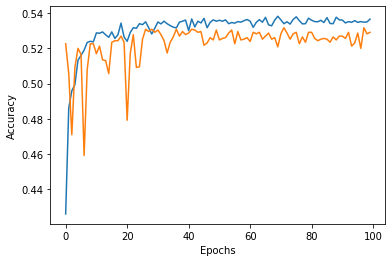

In [613]:
plt.plot(history.history['accuracy'],label='Accuracy')#bleu
plt.plot(history.history['val_accuracy'],label='validation_Accuracy')#orange
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Prédiction 

In [614]:
unique = x_prediction.values
results = []
equal = []
victory = []
loss = []
i = 0
unique[1][6]

5620

In [615]:
model.load_weights("model_Foot_Win.h5")

## Avec les 6 variables

In [616]:
for i in unique:
    predictions_final = model.predict(np.array([[i[7],i[8],i[9],i[10],i[11],i[12]]])) 
    egalite = predictions_final[0][0]*100
    victoire = predictions_final[0][1]*100
    perte = predictions_final[0][2]*100
    result = np.argmax(predictions_final)
    results.append(result)
    equal.append(egalite)
    victory.append(victoire)
    loss.append(perte)
    print(egalite,victoire,perte)

26.878923177719116 54.67458367347717 18.304090201854706
33.355918526649475 38.5269433259964 28.051409125328064
34.03701186180115 41.7515754699707 24.180127680301666
25.311189889907837 60.27082800865173 14.342521131038666
31.23522698879242 36.18209362030029 32.481932640075684
31.494224071502686 36.55915856361389 31.840655207633972
25.908014178276062 58.24376940727234 15.752284228801727
32.12559223175049 37.22265958786011 30.555754899978638
23.07589054107666 66.7748510837555 10.124494135379791
33.25156271457672 37.4435693025589 29.235437512397766
30.79911768436432 29.325374960899353 39.78711664676666
32.61525332927704 37.786865234375 29.51403260231018
33.17851424217224 38.35539221763611 28.396350145339966
33.049383759498596 43.8347190618515 23.07785600423813
21.25691920518875 71.29060626029968 7.443930953741074
26.806119084358215 16.860538721084595 56.31529688835144
31.98322057723999 34.05749797821045 33.86739790439606
31.330451369285583 36.42350435256958 32.13986158370972
32.28314816951

32.12619423866272 37.22329139709473 30.55453598499298
32.68903195858002 37.86383867263794 29.36522662639618
31.43707513809204 43.503957986831665 24.972498416900635
29.765567183494568 27.321940660476685 42.84442663192749
33.24783444404602 44.00680959224701 22.717104852199554
31.255364418029785 34.56583023071289 34.10941958427429
27.63630747795105 52.3817777633667 19.86416131258011
28.639444708824158 23.155325651168823 48.16312491893768
28.01118791103363 21.08689546585083 50.86596608161926
30.384892225265503 47.153475880622864 22.378356754779816
22.98077493906021 10.275886207818985 66.74047112464905
27.347934246063232 18.842630088329315 53.78305912017822
32.582807540893555 37.56231367588043 29.770338535308838
26.28144919872284 15.44182002544403 58.26382637023926
25.44957995414734 59.7612202167511 14.707916975021362
27.972126007080078 19.06326413154602 52.937763929367065
32.201239466667175 38.89787793159485 28.810852766036987
34.06458795070648 39.52545523643494 26.36171281337738
33.034884

## Avec toute les variables

In [617]:
# for i in unique:
#     predictions_final = model.predict(np.array([[i[6],i[7],i[8],i[9],i[10],i[11],i[12],i[13],i[14],i[15],i[16],i[17],i[18],i[19]]])) 
#     egalite = predictions_final[0][0]*100
#     victoire = predictions_final[0][1]*100
#     perte = predictions_final[0][2]*100
#     result = np.argmax(predictions_final)
#     results.append(result)
#     equal.append(egalite)
#     victory.append(victoire)
#     loss.append(perte)

In [633]:
df = {'date':x_prediction.date,'id_match':x_prediction.id_match,'status':x_prediction.status,'id_HomeTeam':x_prediction.idHomeTeam,'id_AwayTeam':x_prediction.idAwayTeam,
      'homeTeam':x_prediction.homeTeam,'AwayTeam':x_prediction.awayTeam,'prediction_egalité':equal,
      'prediction_homeTeam_victory':victory,'prediction_awayTeam_victory':loss,'match_state':results}
df = pd.DataFrame(df)
df

,date,id_match,status,id_HomeTeam,id_AwayTeam,homeTeam,AwayTeam,prediction_egalité,prediction_homeTeam_victory,prediction_awayTeam_victory,match_state
1082,2020-06-30,273885,FINISHED,81,78,FC Barcelona,Club Atlético de Madrid,26.878923,54.674584,18.304090,1
1980,2020-06-30,274432,FINISHED,5543,5620,Vitória SC,Vitória FC,33.355919,38.526943,28.051409,1
1982,2020-07-01,274433,FINISHED,5568,1049,Os Belenenses Futebol,CD Tondela,34.037012,41.751575,24.180128,1
1983,2020-07-01,274431,FINISHED,498,5533,Sporting Clube de Portugal,Gil Vicente FC,25.311190,60.270828,14.342521,1
1083,2020-07-01,273886,FINISHED,95,77,Valencia CF,Athletic Club,31.235227,36.182094,32.481933,1
...,...,...,...,...,...,...,...,...,...,...,...
2024,2020-07-26,274477,SCHEDULED,1903,498,Sport Lisboa e Benfica,Sporting Clube de Portugal,32.738727,42.545530,24.668063,1
2025,2020-07-26,274478,SCHEDULED,5620,5568,Vitória FC,Os Belenenses Futebol,27.527165,52.889735,19.475393,1
2026,2020-07-26,274479,SCHEDULED,5530,5543,CD Santa Clara,Vitória SC,32.744792,37.928858,29.246002,1
2027,2020-07-26,274480,SCHEDULED,5601,5544,Portimonense SC,CD Aves,33.595774,43.839103,22.546399,1


In [634]:
df.to_csv('predictions_gain_perte.csv',index = False)
df.to_json (r'predictions_gain_perte.json')

In [635]:
# 'date':test_csv.date,'id_HomeTeam':test_csv.idHomeTeam,'id_AwayTeam':test_csv.idAwayTeam,'homeTeam':test_csv.homeTeam,'AwayTeam':test_csv.awayTeam,'prediction_egalite':equal,'prediction_homeTeam_victory':victory,'prediction_awayTeam_victory':loss,'match_state':results

In [636]:
np.asarray(equal)
np.asarray(victory)
np.asarray(loss)

array([18.3040902 , 28.05140913, 24.18012768, 14.34252113, 32.48193264,
       31.84065521, 15.75228423, 30.5557549 , 10.12449414, 29.23543751,
       39.78711665, 29.5140326 , 28.39635015, 23.077856  ,  7.44393095,
       56.31529689, 33.8673979 , 32.13986158, 30.12836576, 23.23230803,
       26.99139416, 38.45486939, 14.99087662, 41.59419835, 30.34843206,
        8.79858434, 21.16714418, 50.86437464, 26.19552612, 50.4021883 ,
       21.73632085, 18.32452863, 19.62937862, 10.12330279, 32.68128335,
       23.64323735, 12.6870364 , 28.11598182, 13.62493783, 13.86997402,
       42.07523167, 10.99238321, 27.52225101, 50.33233166, 60.95145345,
       17.1517387 , 32.5114876 , 23.13100249, 22.19425738, 12.88007498,
       28.88858318, 22.69574851,  3.02747414, 11.53642312, 60.61266661,
       30.93675971, 32.00399578, 52.48939991, 22.40154445, 22.21487015,
       17.24397391, 40.28604031, 15.09837955, 46.4795202 , 18.57294589,
       22.82243669, 49.86119866, 10.60241684, 52.53139138, 52.51

In [637]:
predictions1[0]

array([2.6889300e-01, 5.1489007e-01, 2.1558517e-01, 5.9796881e-04,
       3.3850691e-05], dtype=float32)

In [638]:
print(len(equal))
print(len(victory))
test_csv.homeTeam.shape

274
274


(295,)

In [639]:
finished = []
scheduled = []

In [640]:
for i in df.values:
    if i[2] == 'FINISHED':
        finished.append(i)
    else:
        scheduled.append(i)

In [641]:
column_names = ["date","id_match", "status","id_HomeTeam","id_AwayTeam","homeTeam","AwayTeam","prediction_egalite","prediction_homeTeam_victory","prediction_awayTeam_victory","match_state"]
df_fini = pd.DataFrame(finished,columns = column_names)
df_programme = pd.DataFrame(scheduled,columns = column_names)

In [642]:
df_fini

,date,id_match,status,id_HomeTeam,id_AwayTeam,homeTeam,AwayTeam,prediction_egalite,prediction_homeTeam_victory,prediction_awayTeam_victory,match_state
0,2020-06-30,273885,FINISHED,81,78,FC Barcelona,Club Atlético de Madrid,26.878923,54.674584,18.304090,1
1,2020-06-30,274432,FINISHED,5543,5620,Vitória SC,Vitória FC,33.355919,38.526943,28.051409,1
2,2020-07-01,274433,FINISHED,5568,1049,Os Belenenses Futebol,CD Tondela,34.037012,41.751575,24.180128,1
3,2020-07-01,274431,FINISHED,498,5533,Sporting Clube de Portugal,Gil Vicente FC,25.311190,60.270828,14.342521,1
4,2020-07-01,273886,FINISHED,95,77,Valencia CF,Athletic Club,31.235227,36.182094,32.481933,1
...,...,...,...,...,...,...,...,...,...,...,...
81,2020-07-08,279533,FINISHED,107,113,Genoa CFC,SSC Napoli,27.795169,19.045511,53.131449,2
82,2020-07-08,279528,FINISHED,100,112,AS Roma,Parma Calcio 1913,25.554726,59.413046,14.947738,1
83,2020-07-08,279530,FINISHED,102,584,Atalanta BC,UC Sampdoria,23.791905,64.817643,11.353878,1
84,2020-07-08,264672,FINISHED,65,67,Manchester City FC,Newcastle United FC,22.389778,68.330419,9.260965,1


In [643]:
df_programme

,date,id_match,status,id_HomeTeam,id_AwayTeam,homeTeam,AwayTeam,prediction_egalite,prediction_homeTeam_victory,prediction_awayTeam_victory,match_state
0,2020-07-09,264674,SCHEDULED,62,340,Everton FC,Southampton FC,32.721519,44.110474,23.123382,1
1,2020-07-09,264680,SCHEDULED,1044,73,AFC Bournemouth,Tottenham Hotspur FC,28.453103,21.719097,49.783680,2
2,2020-07-09,264671,SCHEDULED,58,66,Aston Villa FC,Manchester United FC,27.640894,18.307383,54.028004,2
3,2020-07-11,264686,SCHEDULED,68,563,Norwich City FC,West Ham United FC,33.081686,37.412852,29.432490,1
4,2020-07-11,264689,SCHEDULED,346,67,Watford FC,Newcastle United FC,31.955975,36.856946,31.088537,1
...,...,...,...,...,...,...,...,...,...,...,...
183,2020-07-26,274477,SCHEDULED,1903,498,Sport Lisboa e Benfica,Sporting Clube de Portugal,32.738727,42.545530,24.668063,1
184,2020-07-26,274478,SCHEDULED,5620,5568,Vitória FC,Os Belenenses Futebol,27.527165,52.889735,19.475393,1
185,2020-07-26,274479,SCHEDULED,5530,5543,CD Santa Clara,Vitória SC,32.744792,37.928858,29.246002,1
186,2020-07-26,274480,SCHEDULED,5601,5544,Portimonense SC,CD Aves,33.595774,43.839103,22.546399,1


In [644]:
df_fini.to_csv('predictions_gain_perte_finished.csv',index=False)
df_fini.to_json (r'predictions_gain_perte_finished.json')

In [645]:
df_programme.to_csv('predictions_gain_perte_scheduled.csv',index=False)
df_programme.to_json (r'predictions_gain_perte_scheduled.json')